In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [ ]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


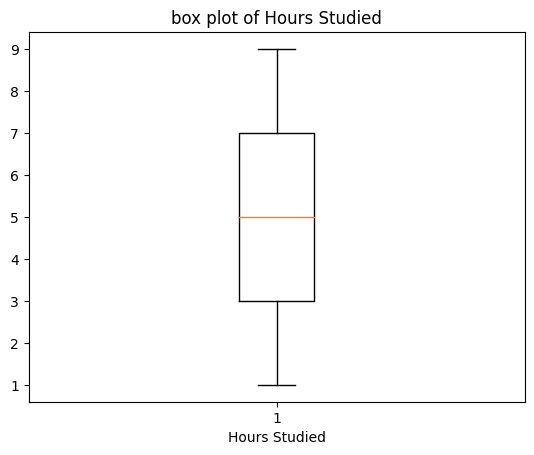

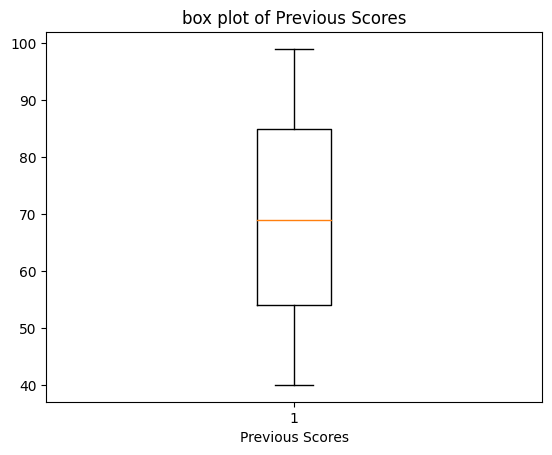

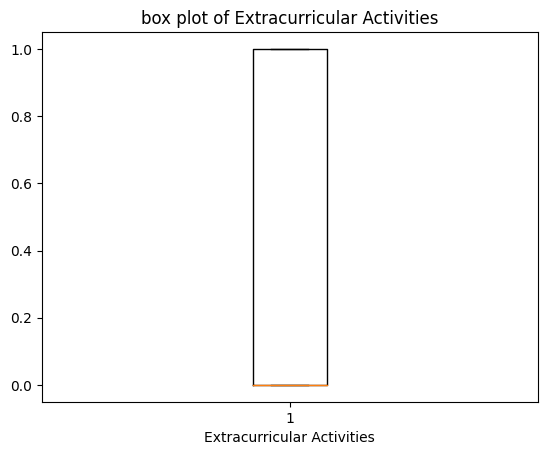

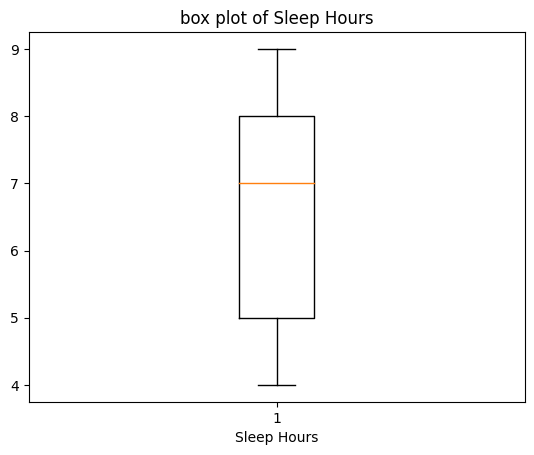

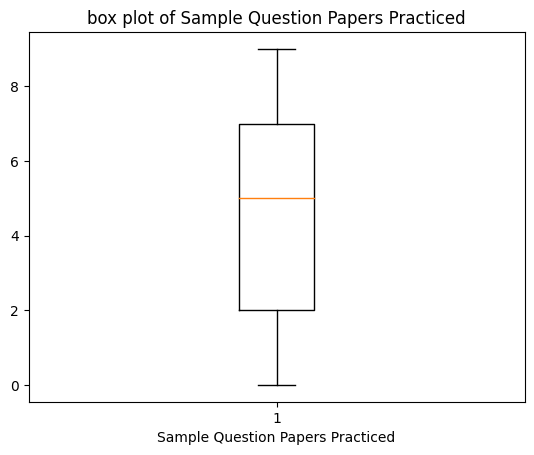

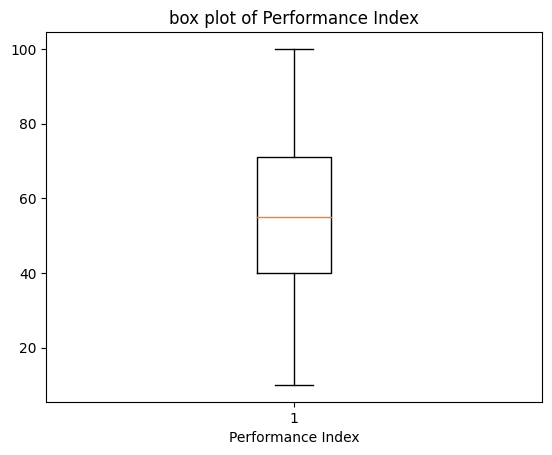

In [ ]:
L = list(df.columns)
for i in L:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.title(f'box plot of {i}')
  plt.show()

# **LINEAR REGRESSION**

# **SIMPLE LINEAR REGRESSION**

In [ ]:
X = df.iloc[:,1:2]
X

,Previous Scores
0,99
1,82
2,51
3,52
4,75
...,...
9995,49
9996,64
9997,83
9998,97


In [ ]:
Y = df.iloc[:,-1]
Y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
#accuracy

from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.825905155222155

In [ ]:
X = df.iloc[:,:-1]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [ ]:
Y = df.iloc[:,-1]
Y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

# **MULTIPLE LINEAR REGRESSION**

In [ ]:
# spllitting of data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
# accuracy

from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9880686410711422

# **SUPPORT VECTOR REGRESSOR**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_train

array([[ 0.01177784,  1.46795645, -1.00075028, -0.31740964, -0.20579059],
       [-1.14669864,  1.63989277, -1.00075028,  0.2720233 , -0.20579059],
       [-1.14669864, -0.25140672,  0.99925028,  0.86145625, -1.25196174],
       ...,
       [-1.53285746,  0.37902645,  0.99925028, -0.31740964,  0.14293313],
       [-0.37438098, -1.45496093, -1.00075028, -1.49627552,  1.18910429],
       [ 1.17025433,  0.78021119,  0.99925028,  0.86145625, -1.25196174]])

In [ ]:
X_test

array([[-0.37438098, -0.1367825 , -1.00075028,  1.45088919, -0.5545143 ],
       [ 1.17025433, -0.53796724, -1.00075028, -1.49627552,  0.84038057],
       [ 0.39793667,  1.18139592, -1.00075028, -0.90684258,  0.49165685],
       ...,
       [-1.14669864,  0.9521475 ,  0.99925028,  0.2720233 ,  0.84038057],
       [-0.37438098, -1.51227304, -1.00075028,  0.86145625,  0.14293313],
       [-0.76053981, -1.62689725, -1.00075028, -0.90684258, -1.25196174]])

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

SVR()

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9849071594435442

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
Y_pred = regressor.predict(X_test)

In [ ]:
# accuracy

from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9743841996133451

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
# accuracy

from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9743841996133451

In [ ]:
Dict = {
    'Model': 'Accuracy',
    'Simple Linear Regression': 0.82590515522215,
    'Multiple Linear Regression': 0.9880686410711422,
    'Support Vector Regression':0.9849071594435442,
    'Decision Tree Regression': 0.9743841996133451,
    'Random Forest Regression': 0.9743841996133451
}

ser = pd.Series(Dict)
print(ser)

Model                         Accuracy
Simple Linear Regression      0.825905
Multiple Linear Regression    0.988069
Support Vector Regression     0.984907
Decision Tree Regression      0.974384
Random Forest Regression      0.974384
dtype: object
